#📌 Extracción

In [76]:
import pandas as pd
import numpy as np

In [77]:
url_json = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url_json)

df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [78]:
base_columns = df[['customerID', 'Churn']]

customer_df = pd.json_normalize(df['customer'], sep='_')
phone_df = pd.json_normalize(df['phone'], sep='_')
internet_df = pd.json_normalize(df['internet'], sep='_')
account_df = pd.json_normalize(df['account'], sep='_')

df = pd.concat([base_columns, customer_df, phone_df, internet_df, account_df], axis=1)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [80]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [81]:
for col in df.columns:

  print(f'{col}: {df[col].unique()}')
  print('-'* 20)

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------
Churn: ['No' 'Yes' '']
--------------------
gender: ['Female' 'Male']
--------------------
SeniorCitizen: [0 1]
--------------------
Partner: ['Yes' 'No']
--------------------
Dependents: ['Yes' 'No']
--------------------
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
PhoneService: ['Yes' 'No']
--------------------
MultipleLines: ['No' 'Yes' 'No phone service']
--------------------
InternetService: ['DSL' 'Fiber optic' 'No']
--------------------
OnlineSecurity: ['No' 'Yes' 'No internet service']
--------------------
OnlineBackup: ['Yes' 'No' 'No internet service']
--------------------
DeviceProtection: ['No' 'Yes' 'No internet service']
--------------------
TechSuppor

In [82]:
# Convertir a binarios
def convertir_binarios(df, columna, values_map={'Yes': 1, 'No': 0}):
  df[columna] = df[columna].map(values_map).astype(np.int64)
  return df[columna]

## Manejo de inconsistencias

### customerID

In [83]:
df.customerID

,customerID
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7262,9987-LUTYD
7263,9992-RRAMN
7264,9992-UJOEL
7265,9993-LHIEB


In [84]:
df.customerID.unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [85]:
df.customerID.isnull().value_counts()

,count
customerID,
False,7267


### Churn

In [86]:
df.Churn

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [87]:
df.Churn.unique()

array(['No', 'Yes', ''], dtype=object)

In [88]:
# Churn: Se reemplaza '' por NaN y luego se decide si imputar o eliminar esas filas. Es la variable objetivo, así que hay que limpiarla bien.
df['Churn'] = df['Churn'].replace('', np.nan)
df['Churn'].isna().value_counts()

,count
Churn,
False,7043
True,224


In [89]:
df.Churn.unique()

array(['No', 'Yes', nan], dtype=object)

### gender

In [90]:
df.gender

,gender
0,Female
1,Male
2,Male
3,Male
4,Female
...,...
7262,Female
7263,Male
7264,Male
7265,Male


In [91]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [92]:
df.gender.isnull().value_counts()

,count
gender,
False,7267


In [93]:
# gender: Codificar a numérico si el modelo lo requiere (0 1).
df['gender'] = df['gender'].apply(lambda x: 0 if x == 'Female' else 1)
df['gender']

,gender
0,0
1,1
2,1
3,1
4,0
...,...
7262,0
7263,1
7264,1
7265,1


In [94]:
df['gender'].value_counts()

,count
gender,
1,3675
0,3592


In [95]:
df.gender.unique()

array([0, 1])

### SeniorCitizen


In [96]:
df.SeniorCitizen

,SeniorCitizen
0,0
1,0
2,0
3,1
4,1
...,...
7262,0
7263,0
7264,0
7265,0


In [97]:
df.SeniorCitizen.unique()

array([0, 1])

### Partner

In [98]:
df.Partner

,Partner
0,Yes
1,No
2,No
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,Yes


In [99]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [100]:
df.Partner.isnull().value_counts()

,count
Partner,
False,7267


In [101]:
df['Partner'] = convertir_binarios(df, 'Partner')
df.Partner.value_counts()

,count
Partner,
0,3749
1,3518


In [102]:
df.Partner.unique()

array([1, 0])

### Dependents

In [103]:
df.Dependents

,Dependents
0,Yes
1,No
2,No
3,No
4,No
...,...
7262,No
7263,No
7264,No
7265,Yes


In [104]:
df.Dependents.unique()

array(['Yes', 'No'], dtype=object)

In [105]:
df.Dependents = convertir_binarios(df, 'Dependents')
df.Dependents.value_counts()

,count
Dependents,
0,5086
1,2181


In [106]:
df.Dependents.unique()

array([1, 0])

### tenure

In [107]:
df.tenure

,tenure
0,9
1,9
2,4
3,13
4,3
...,...
7262,13
7263,22
7264,2
7265,67


In [108]:
df.tenure.unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

### PhoneService

In [109]:
df.PhoneService

,PhoneService
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
7262,Yes
7263,Yes
7264,Yes
7265,Yes


In [110]:
df.PhoneService.unique()

array(['Yes', 'No'], dtype=object)

In [111]:
df.PhoneService = convertir_binarios(df, 'PhoneService')

In [112]:
df.PhoneService.unique()

array([1, 0])

### MultipleLines

In [113]:
df.MultipleLines

,MultipleLines
0,No
1,Yes
2,No
3,No
4,No
...,...
7262,No
7263,Yes
7264,No
7265,No


In [114]:
df.MultipleLines.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

### InternetService

In [115]:
df.InternetService

,InternetService
0,DSL
1,DSL
2,Fiber optic
3,Fiber optic
4,Fiber optic
...,...
7262,DSL
7263,Fiber optic
7264,DSL
7265,DSL


In [116]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

### OnlineSecurity

In [117]:
df.OnlineSecurity

,OnlineSecurity
0,No
1,No
2,No
3,No
4,No
...,...
7262,Yes
7263,No
7264,No
7265,Yes


In [118]:
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

### OnlineBackup

In [119]:
df.OnlineBackup

,OnlineBackup
0,Yes
1,No
2,No
3,Yes
4,No
...,...
7262,No
7263,No
7264,Yes
7265,No


In [120]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

### DeviceProtection

In [121]:
df.DeviceProtection

,DeviceProtection
0,No
1,No
2,Yes
3,Yes
4,No
...,...
7262,No
7263,No
7264,No
7265,Yes


In [122]:
df.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

### TechSupport



In [123]:
df.TechSupport

,TechSupport
0,Yes
1,No
2,No
3,No
4,Yes
...,...
7262,Yes
7263,No
7264,No
7265,Yes


In [124]:
df.TechSupport.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

### StreamingTV

In [125]:
df.StreamingTV

,StreamingTV
0,Yes
1,No
2,No
3,Yes
4,Yes
...,...
7262,No
7263,No
7264,No
7265,No


In [126]:
df.StreamingTV.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

### StreamingMovies

In [127]:
df.StreamingMovies

,StreamingMovies
0,No
1,Yes
2,No
3,Yes
4,No
...,...
7262,No
7263,Yes
7264,No
7265,Yes


In [128]:
df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

### Contract

In [129]:
df.Contract

,Contract
0,One year
1,Month-to-month
2,Month-to-month
3,Month-to-month
4,Month-to-month
...,...
7262,One year
7263,Month-to-month
7264,Month-to-month
7265,Two year


In [130]:
df.Contract.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

### PaperlessBilling

In [131]:
df.PaperlessBilling

,PaperlessBilling
0,Yes
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,Yes
7265,No


In [132]:
df.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [133]:
df.PaperlessBilling = convertir_binarios(df, 'PaperlessBilling')

In [134]:
df.PaperlessBilling.unique()

array([1, 0])

### PaymentMethod

In [135]:
df.PaymentMethod

,PaymentMethod
0,Mailed check
1,Mailed check
2,Electronic check
3,Electronic check
4,Mailed check
...,...
7262,Mailed check
7263,Electronic check
7264,Mailed check
7265,Mailed check


In [136]:
df.PaymentMethod.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

### Charges_Monthly

In [137]:
df.Charges_Monthly

,Charges_Monthly
0,65.60
1,59.90
2,73.90
3,98.00
4,83.90
...,...
7262,55.15
7263,85.10
7264,50.30
7265,67.85


In [138]:
df.Charges_Monthly.unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

### Charges_Total

In [139]:
df.Charges_Total

,Charges_Total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4
...,...
7262,742.9
7263,1873.7
7264,92.75
7265,4627.65


In [140]:
df.Charges_Total.unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [141]:
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')

In [142]:
df.Charges_Total.unique()

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

## Review

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Columna de cuentas diarias

In [144]:
df['Charges_Daily'] = (df['Charges_Monthly'] / 30).round(2)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Daily
0,0002-ORFBO,No,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_Monthly,Charges_Total,Charges_Daily
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157292
std,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000,1.180000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


## Distribución de evasión

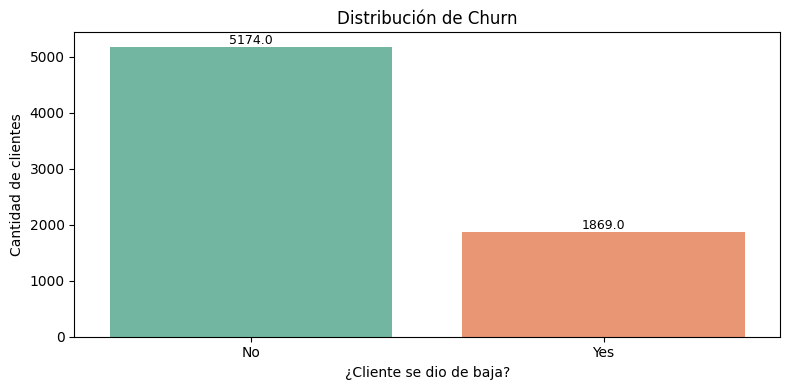

In [147]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)

# Agregar los valores encima de cada barra
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # posición centrada sobre la barra
        y=height + 1,                     # ligeramente encima de la barra
        s=str(height),                   # valor como texto
        ha='center', va='bottom',        # alineación
        fontsize=9, color='black'
    )

# Títulos y etiquetas
plt.title('Distribución de Churn')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()

## Recuento de evasión por variables categóricas

### Evasión por género

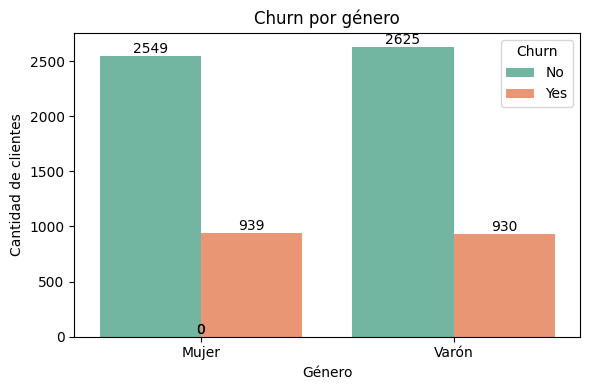

In [148]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')

# Asegurar que los ticks sean [0, 1]
ax.set_xticks([0, 1])

# Asignar etiquetas a esos ticks
ax.set_xticklabels(['Mujer', 'Varón'])

# Añadir etiquetas con las cantidades encima de cada barra
for p in ax.patches:
    height = p.get_height()  # Altura de la barra (cantidad)
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # posición horizontal centrada
        y=height + 1,                      # un poco arriba de la barra
        s=int(height),                    # texto (cantidad)
        ha='center', va='bottom'          # alineación
    )

plt.title('Churn por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()



### Comparación por tipo de contrato

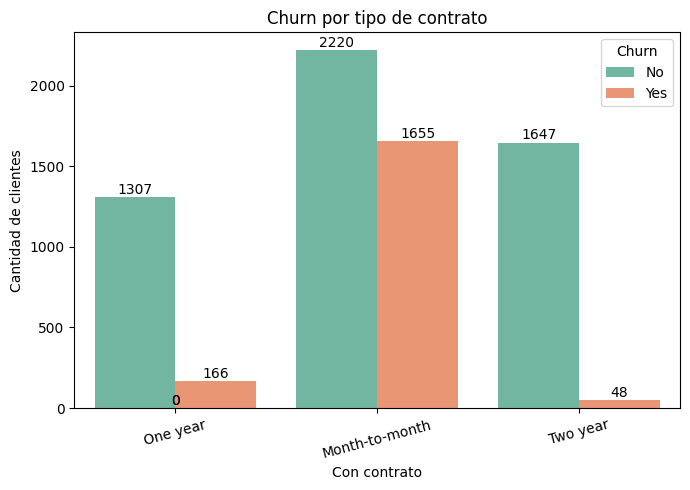

In [149]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')

# Añadir etiquetas con las cantidades encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,
        s=int(height),
        ha='center',
        va='bottom'
    )

plt.title('Churn por tipo de contrato')
plt.xlabel('Con contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Comparación por método de pago


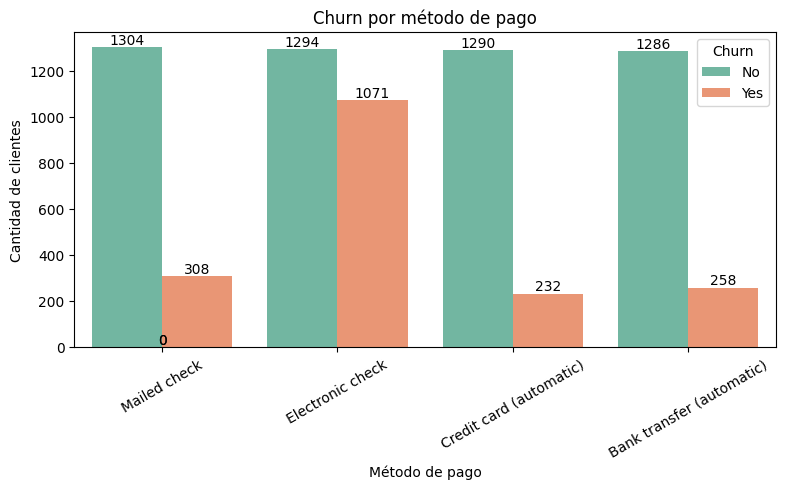

In [75]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')

# Añadir etiquetas con las cantidades encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,
        s=int(height),
        ha='center',
        va='bottom'
    )

plt.title('Churn por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Conteo de evasión por variables numéricas

In [164]:
# ─────────────────────────────────────────────
# 1. Limpieza y preparación
# ─────────────────────────────────────────────

df = df[df['Churn'].isin(['Yes', 'No'])]  # Elimina nulos o valores no válidos

df.Churn.dropna

# Convertimos 'Churn' a 0 y 1 para facilitar el análisis
df['Churn_flag'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Asegurarse de que las variables numéricas estén bien
variables_numericas = ['tenure', 'Charges_Monthly', 'Charges_Total', 'Charges_Daily']

# Eliminar filas con NaN en alguna variable numérica importante
df = df.dropna(subset=variables_numericas)

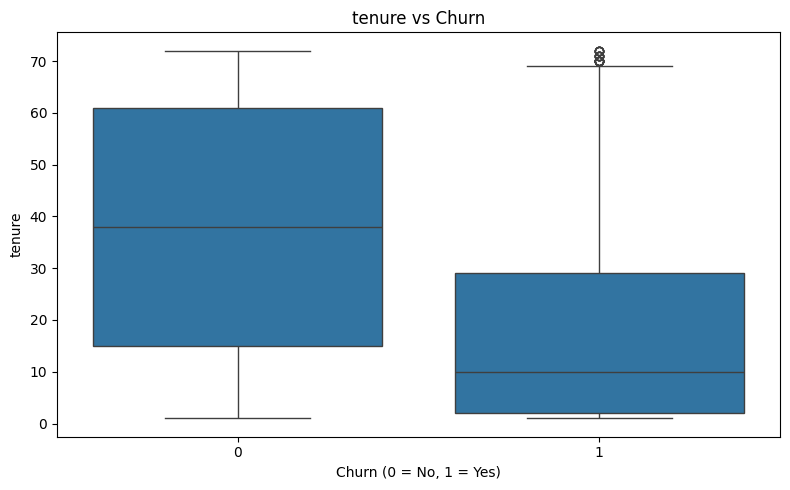

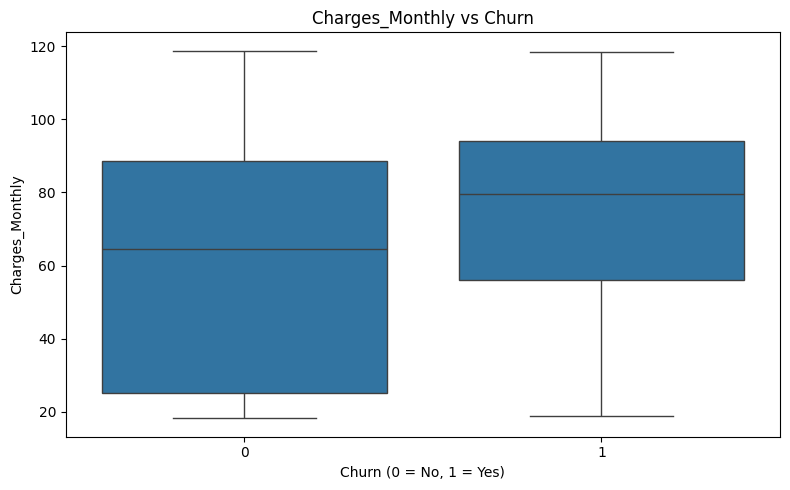

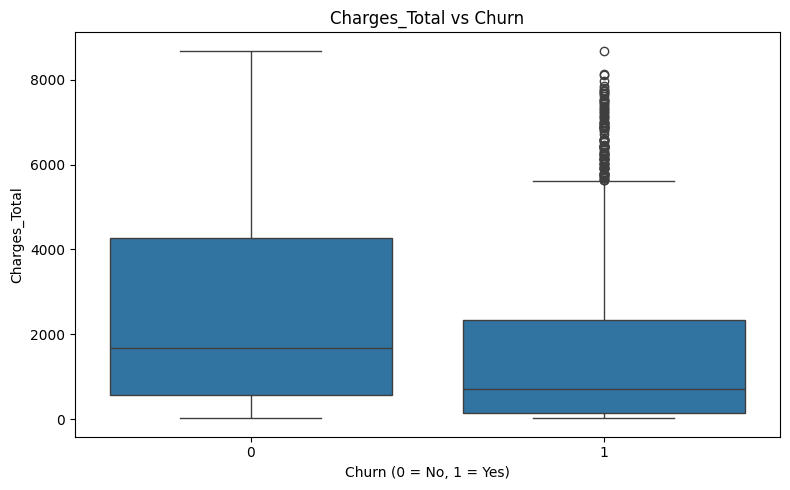

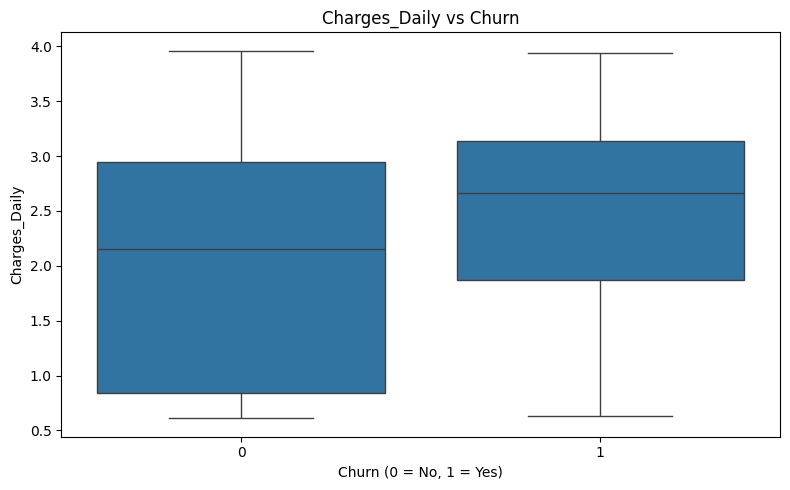

In [165]:
# ─────────────────────────────────────────────
# 2. Visualización con boxplots
# ─────────────────────────────────────────────

for var in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Churn_flag', y=var)
    plt.title(f'{var} vs Churn')
    plt.xlabel('Churn (0 = No, 1 = Yes)')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

In [166]:
# ─────────────────────────────────────────────
# 3. Estadísticas descriptivas por grupo
# ─────────────────────────────────────────────

# Mostrar estadísticas descriptivas por grupo de churn
stats = df.groupby('Churn_flag')[variables_numericas].describe()
print("Estadísticas descriptivas por grupo de evasión:")
print(stats)

Estadísticas descriptivas por grupo de evasión:
            tenure                                                     \
             count       mean        std  min   25%   50%   75%   max   
Churn_flag                                                              
0           5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0   
1           1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

           Charges_Monthly             ... Charges_Total           \
                     count       mean  ...           75%      max   
Churn_flag                             ...                          
0                   5163.0  61.307408  ...      4264.125  8672.45   
1                   1869.0  74.441332  ...      2331.300  8684.80   

           Charges_Daily                                                    
                   count      mean       std   min   25%   50%   75%   max  
Churn_flag                                                                  
0        


Conteo de evasión por intervalo de tenure:
Churn         No   Yes
tenure_bin            
0-12        1138  1037
13-24        730   294
25-48       1269   325
49-72       2026   213


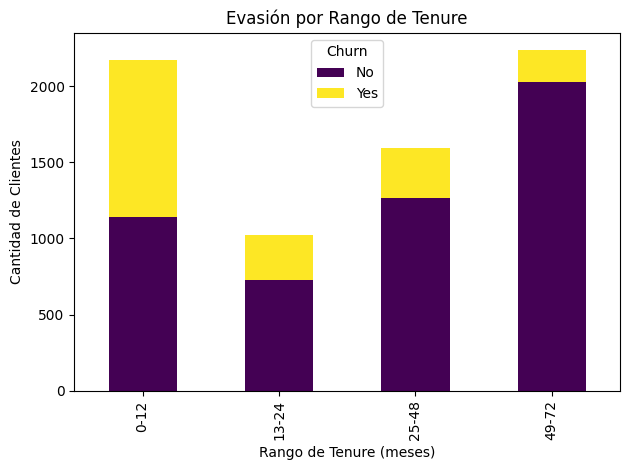

In [167]:
# ─────────────────────────────────────────────
# 4. Análisis por bins
# ─────────────────────────────────────────────

# Crear bins de tenure
df['tenure_bin'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12', '13-24', '25-48', '49-72'])

# Conteo de evasión por rango de tenure
conteo_tenure = pd.crosstab(df['tenure_bin'], df['Churn'])
print("\nConteo de evasión por intervalo de tenure:")
print(conteo_tenure)

# (Gráfico de barras)
conteo_tenure.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Evasión por Rango de Tenure')
plt.xlabel('Rango de Tenure (meses)')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

## Extra

In [172]:

corr_matrix = df[['Churn_flag', 'tenure', 'Charges_Monthly', 'Charges_Total', 'Charges_Daily']].corr()

# Mostrar correlación de todas con la evasión
print("📌 Correlación de variables con la evasión:")
print(corr_matrix['Churn_flag'].sort_values(ascending=False))

📌 Correlación de variables con la evasión:
Churn_flag         1.000000
Charges_Daily      0.192914
Charges_Monthly    0.192858
Charges_Total     -0.199484
tenure            -0.354049
Name: Churn_flag, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


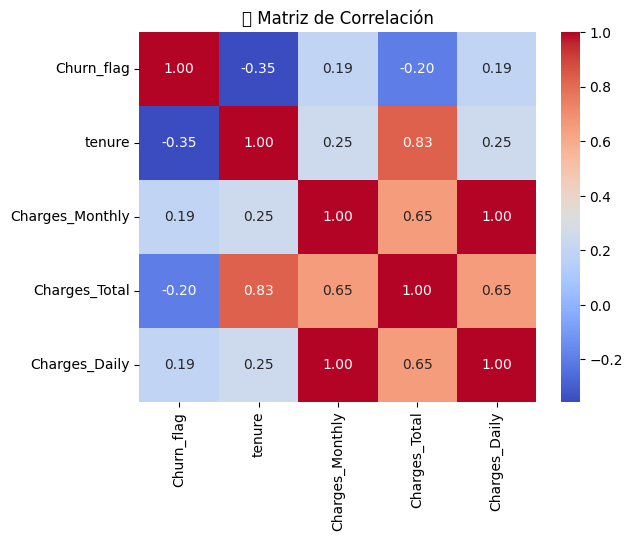

In [173]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('🔍 Matriz de Correlación')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


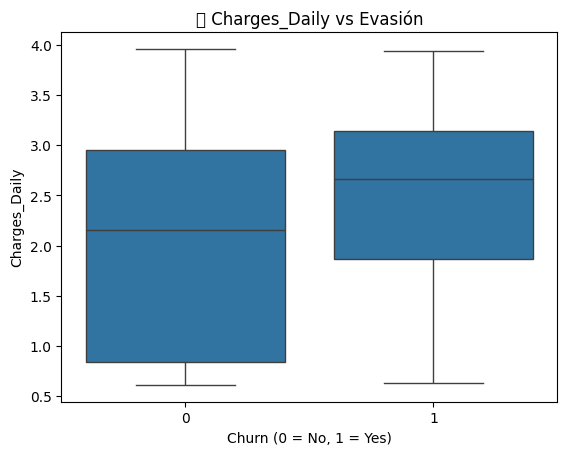

In [174]:
sns.boxplot(x='Churn_flag', y='Charges_Daily', data=df)
plt.title("📊 Charges_Daily vs Evasión")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Charges_Daily")
plt.show()

🔢 Correlación entre número de servicios y evasión:
                TotalServicios  Churn_flag
TotalServicios        1.000000   -0.352433
Churn_flag           -0.352433    1.000000


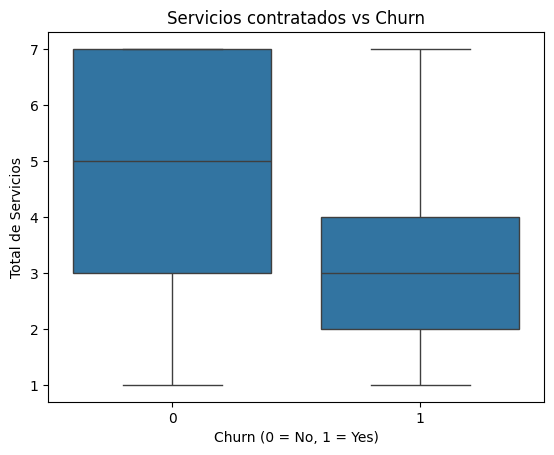

In [175]:
# Contar servicios contratados (valor distinto a 'No' implica que lo tienen activo)
servicios = ['PhoneService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Asumimos que 'No' significa que no tiene el servicio
df['TotalServicios'] = df[servicios].apply(lambda x: (x != 'No').sum(), axis=1)

# Ver correlación con churn
print("🔢 Correlación entre número de servicios y evasión:")
print(df[['TotalServicios', 'Churn_flag']].corr())

# Visualizar
sns.boxplot(x='Churn_flag', y='TotalServicios', data=df)
plt.title("Servicios contratados vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Total de Servicios")
plt.show()


#📄Informe final


# 📊 Informe Final – Análisis de Evasión de Clientes (Churn) en TelecomX LATAM

## 🔹 Introducción

El objetivo principal de este análisis fue identificar los factores que influyen en la **evasión de clientes (Churn)** en la empresa de telecomunicaciones **TelecomX LATAM**. Este fenómeno representa un desafío crítico para el sector, ya que la pérdida de clientes afecta directamente los ingresos y la sostenibilidad a largo plazo. A través de este trabajo, buscamos analizar los datos proporcionados, limpiar y transformarlos, descubrir patrones relevantes y proponer estrategias para **reducir la tasa de Churn**.

## 🔹 Limpieza y Tratamiento de Datos

El proceso comenzó con la **extracción de datos** desde un archivo `.json` alojado en un repositorio público. Las principales acciones realizadas fueron:

- **Normalización** de estructuras anidadas (por ejemplo, información del cliente, teléfono e internet).
- **Concatenación de subtablas** para unificar toda la información en un único DataFrame.
- Eliminación de **valores nulos o inconsistentes** en columnas clave.
- Conversión de columnas categóricas y numéricas al formato adecuado.
- Creación de una columna binaria (`Churn`) para representar si un cliente se fue o no.

Estas transformaciones permitieron preparar los datos para un análisis exploratorio robusto.

## 🔹 Análisis Exploratorio de Datos (EDA)

Se realizaron diversos análisis para entender la relación entre las características del cliente y su probabilidad de abandonar la empresa. Algunos puntos destacados:

- **Visualizaciones de distribución** de variables como tipo de contrato, servicios contratados, métodos de pago y antigüedad.
- Identificación de una mayor tasa de evasión en clientes con:
  - Contratos **mensuales**
  - Múltiples servicios cancelados
  - Métodos de pago como débito automático
- Uso de gráficos como:
  - Barras y histogramas para variables categóricas y numéricas.
  - Mapas de calor de correlación.
  - Comparaciones de Churn según servicio (internet, teléfono, etc.)

Estas visualizaciones facilitaron la identificación de patrones y segmentos de clientes con mayor riesgo de churn.

## 🔹 Conclusiones e Insights

Entre los principales hallazgos del análisis, destacamos:

- Los **clientes con contratos a corto plazo (mensuales)** son significativamente más propensos a abandonar la empresa.
- **Servicios como internet y llamadas** afectan directamente la permanencia del cliente.
- La **antigüedad del cliente** tiene un peso considerable: mientras más nuevo el cliente, más alta es la tasa de Churn.
- Ciertas combinaciones de servicios y métodos de pago elevan el riesgo de abandono.

Estos insights pueden ayudar a TelecomX LATAM a identificar segmentos vulnerables y actuar de forma proactiva.

## 🔹 Recomendaciones

Con base en el análisis realizado, se proponen las siguientes estrategias para reducir la evasión:

1. **Fomentar contratos a largo plazo**, ofreciendo descuentos o beneficios exclusivos por fidelidad.
2. **Mejorar la experiencia de usuario** en los primeros meses, con campañas de bienvenida y atención personalizada.
3. Identificar clientes en riesgo usando modelos de clasificación y aplicar **ofertas personalizadas**.
4. Revisar la estructura de precios y calidad del servicio de internet, dado su impacto en la decisión de quedarse o irse.
5. Implementar un sistema de alertas tempranas basadas en comportamiento del cliente para prevenir abandonos.
